In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


# Loading and Exploring the dataset to check the following
#### * Shape of dataset
#### * Null columns
#### * Balanced/Imbalanced dataset
#### * Categorical/Numerical columns
#### * Distribution of data

In [2]:
df=pd.read_csv('../input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')

In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
for cols in df.columns:
    if(df[cols].dtype=='object' or df[cols].dtype=='bool'):
        print(cols)

Month
VisitorType
Weekend
Revenue


In [6]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

# Converting *non*-Numerical columns to numeric form

In [7]:
df['Weekend']=df['Weekend'].replace({True:'Week1',False:'Week0'})
df['Revenue']=df['Revenue'].replace({True:'Rev1',False:'Rev0'})
df=pd.concat([df,pd.get_dummies(df['Month']),pd.get_dummies(df['VisitorType']),pd.get_dummies(df['Weekend']),pd.get_dummies(df['Revenue'])],axis=1)

#### Dropping extra columns

In [8]:
df=df.drop(['Month','VisitorType','Weekend','Revenue','Rev0'],axis=1)

In [9]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,May,Nov,Oct,Sep,New_Visitor,Other,Returning_Visitor,Week0,Week1,Rev1
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Aug                   

## Checking the distribution of data

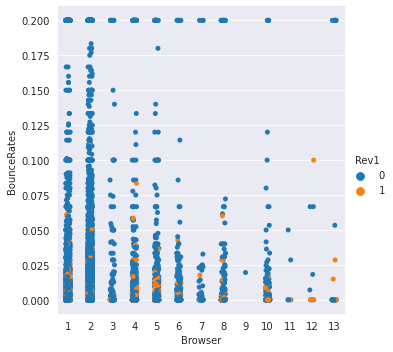

In [11]:
sns.catplot(x="Browser", y="BounceRates", hue="Rev1", data=df)

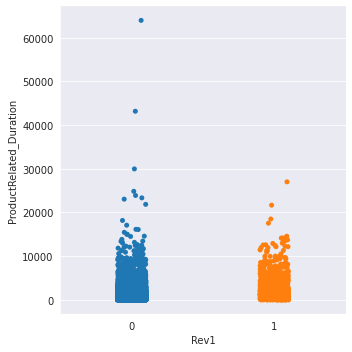

In [12]:
sns.catplot(x="Rev1", y="ProductRelated_Duration", data=df)

# Selecting the most `important` feature

In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
mi_score=mutual_info_classif(df.drop('Rev1',axis=1),df['Rev1'])
mi_score=pd.Series(mi_score*100,index=df.drop('Rev1',axis=1).columns)
mi_score=mi_score.sort_values(ascending=False)
mi_score

PageValues                 16.494881
ExitRates                   4.348175
ProductRelated_Duration     3.252327
BounceRates                 2.169238
ProductRelated              2.142940
Administrative_Duration     1.572968
Administrative              1.306220
TrafficType                 1.289679
Nov                         1.130278
Informational_Duration      1.081134
SpecialDay                  0.850077
Informational               0.650211
Returning_Visitor           0.387086
Feb                         0.356778
New_Visitor                 0.322855
Aug                         0.216652
Sep                         0.209706
Browser                     0.187904
Dec                         0.156718
Oct                         0.145481
June                        0.040999
Jul                         0.000000
Mar                         0.000000
May                         0.000000
Region                      0.000000
Other                       0.000000
OperatingSystems            0.000000
W

In [15]:
top_fea=mi_score.index[:9]

# Splitting the dataset into:
* Test
* Train
* Validation set

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
df_sc=StandardScaler().fit_transform(df[top_fea])
xtr,xte,ytr,yte=train_test_split(df_sc,df['Rev1'],random_state=108,test_size=0.27)
xtr,xval,ytr,yval=train_test_split(xtr,ytr,random_state=108,test_size=0.27)

# Building the Artificial-Neural-Net

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

2021-11-24 06:25:30.404210: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [18]:
model=keras.Sequential([
    layers.Dense(512,activation='relu',input_shape=(9,)),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(978,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1224,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),
    layers.Dense(1528,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(828,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.27),
    layers.Dense(428,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.32),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

call=callbacks.EarlyStopping(patience=12,min_delta=0.0001,restore_best_weights=True)
history=model.fit(xtr,ytr,batch_size=48,epochs=45,validation_data=(xval,yval),callbacks=call)

2021-11-24 06:25:34.168028: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-24 06:25:34.171419: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-24 06:25:34.218519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 06:25:34.219166: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-11-24 06:25:34.219221: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-11-24 06:25:34.267213: I tensorflow/stream_executor/platform/def

Epoch 1/45


2021-11-24 06:25:38.659037: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 18/137 [==>...........................] - ETA: 0s - loss: 0.8918 - accuracy: 0.5684

2021-11-24 06:25:39.458915: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


137/137 [==============================] - 5s 11ms/step - loss: 0.6652 - accuracy: 0.7189 - val_loss: 0.3511 - val_accuracy: 0.8630
Epoch 2/45
137/137 [==============================] - 1s 7ms/step - loss: 0.3364 - accuracy: 0.8809 - val_loss: 0.3050 - val_accuracy: 0.8782
Epoch 3/45
137/137 [==============================] - 1s 7ms/step - loss: 0.2971 - accuracy: 0.8928 - val_loss: 0.2742 - val_accuracy: 0.8942
Epoch 4/45
137/137 [==============================] - 1s 7ms/step - loss: 0.2704 - accuracy: 0.8992 - val_loss: 0.2748 - val_accuracy: 0.8852
Epoch 5/45
137/137 [==============================] - 1s 7ms/step - loss: 0.2722 - accuracy: 0.8892 - val_loss: 0.2835 - val_accuracy: 0.8934
Epoch 6/45
137/137 [==============================] - 1s 7ms/step - loss: 0.2439 - accuracy: 0.8991 - val_loss: 0.2934 - val_accuracy: 0.8979
Epoch 7/45
137/137 [==============================] - 1s 7ms/step - loss: 0.2504 - accuracy: 0.8950 - val_loss: 0.2606 - val_accuracy: 0.8947
Epoch 8/45
137/1

In [19]:
his=pd.DataFrame(history.history)

In [20]:
his.head()

,loss,accuracy,val_loss,val_accuracy
0,0.521485,0.799391,0.351121,0.862963
1,0.325335,0.881583,0.304965,0.878189
2,0.296687,0.889650,0.274199,0.894239
3,0.276573,0.891629,0.274813,0.885185
4,0.262275,0.892694,0.283539,0.893416


# Visualizing the Accuracy  & Loss during
* Training & Validation 

<AxesSubplot:>

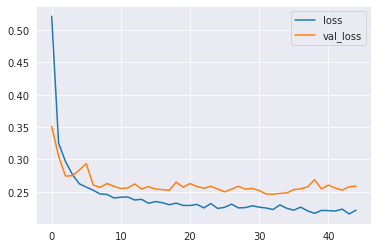

In [21]:
his.loc[:,['loss','val_loss']].plot()

<AxesSubplot:>

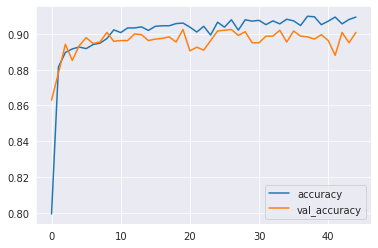

In [22]:
his.loc[:,['accuracy','val_accuracy']].plot()

# Evaluating the model

In [23]:
model.evaluate(xte,yte)

105/105 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.8988


[0.25086456537246704, 0.8987988233566284]

# `89.24%` accuracy!